# Part 1 - Descriptive Analysis
---

## Data Pre-Processing
---

In [1]:
# Define the selected variables
col = ["VehiclePrice","AgeOfVehicle",
       "PastNumberOfClaims","AgeOfPolicyHolder",
       "NumberOfSuppliments"]

- It takes value 1 in case of predicted as anomaly, and

- 0 otherwise.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read dataset function
def read_data(path):
    """
    Reads a CSV file at the given path, removes any duplicate rows,
    and returns its contents as a pandas DataFrame.

    Parameters
    ----------
    path : str
        The sample data input path (csv format)

    Return
    ------
    df : pd.DataFrame
        The sample data input
    """
    # Read data
    df = pd.read_csv(path)

    # Validate
    print('Data shape:', df.shape)

    return df

In [4]:
# read data
df_raw = read_data('/content/drive/MyDrive/fraud_oracle.csv')
df_raw.head()

Data shape: (15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
# Get only relevant columns we choose
df = df_raw[col].copy()

In [6]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   VehiclePrice         15420 non-null  object
 1   AgeOfVehicle         15420 non-null  object
 2   PastNumberOfClaims   15420 non-null  object
 3   AgeOfPolicyHolder    15420 non-null  object
 4   NumberOfSuppliments  15420 non-null  object
dtypes: object(5)
memory usage: 602.5+ KB


In [7]:
from sklearn.model_selection import train_test_split

def split_train_test(X, test_size, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data
    test_size : float
        The proportion of number of test data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data
    """

    # Then, split train and test
    X_train, X_test = train_test_split(
        X,
        test_size = test_size,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('X test shape :', X_test.shape)

    return X_train, X_test

In [8]:
# Run the code
splitted_data = split_train_test(
    X = df,
    test_size = 0.4,
    random_state = 42
)

X_train, X_test = splitted_data

X train shape: (9252, 5)
X test shape : (6168, 5)


## EDA
---

In [9]:
# Print train set shape
print('X train shape:', X_train.shape)

X train shape: (9252, 5)


In [10]:
# create EDA dataset
eda_df = X_train.copy()

In [11]:
# Print train set shape after concat
print('eda_df shape:', eda_df.shape)

eda_df shape: (9252, 5)


Check Statistic Descriptive

In [12]:
eda_df.describe().T

,count,unique,top,freq
VehiclePrice,9252,6,20000 to 29000,4835
AgeOfVehicle,9252,8,7 years,3446
PastNumberOfClaims,9252,4,2 to 4,3293
AgeOfPolicyHolder,9252,9,31 to 35,3353
NumberOfSuppliments,9252,4,none,4225


Cleaning Data

In [13]:
eda_df.isna().sum()

VehiclePrice           0
AgeOfVehicle           0
PastNumberOfClaims     0
AgeOfPolicyHolder      0
NumberOfSuppliments    0
dtype: int64

Check Distribution

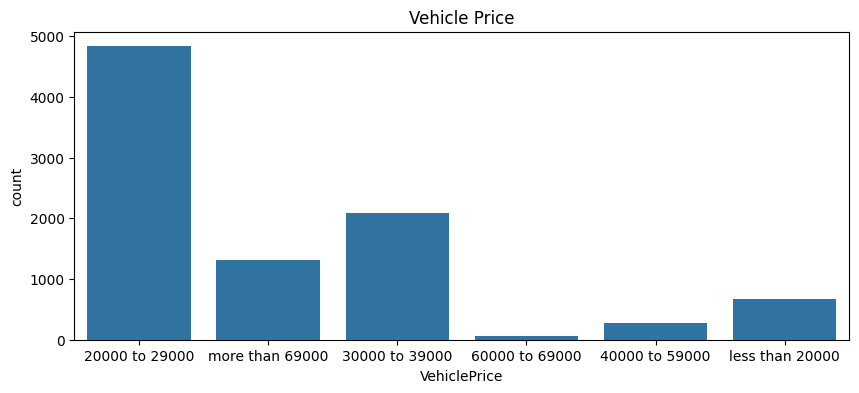

In [14]:
# Visualize the VehiclePrice
plt.figure(figsize = (10,4))
sns.countplot(data = eda_df,
            x = "VehiclePrice")

plt.title("Vehicle Price")
plt.show()

Mosts claims have 20k to 29k vehicle price

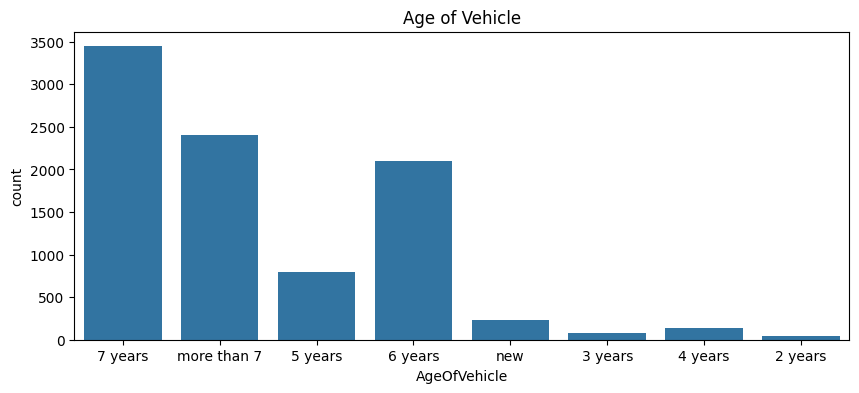

In [15]:
# Visualize the AgeOfVehicle
plt.figure(figsize = (10,4))
sns.countplot(data = eda_df,
            x = "AgeOfVehicle")

plt.title("Age of Vehicle")
plt.show()

Most claims has old age of vehicle

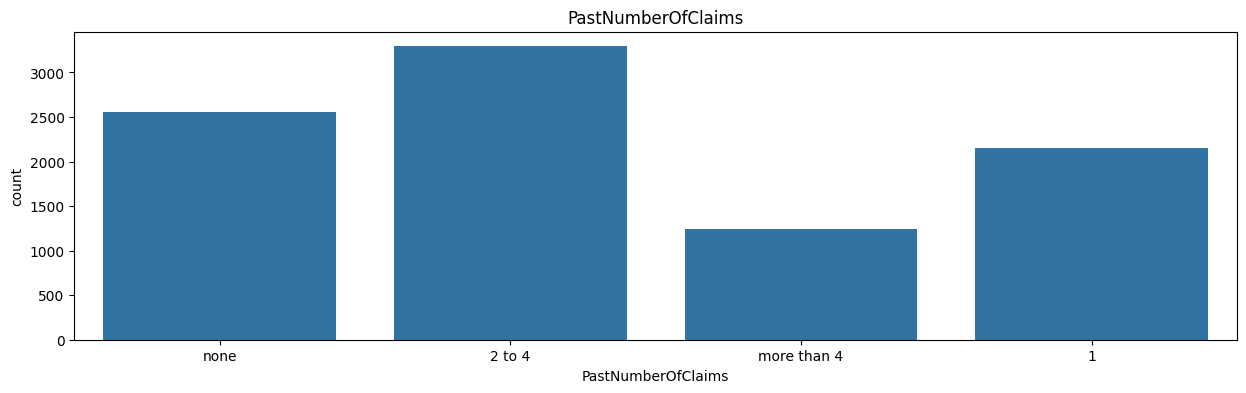

In [16]:
# Visualize the PastNumberOfClaims
plt.figure(figsize = (15,4))
sns.countplot(data = eda_df,
            x = "PastNumberOfClaims")

plt.title("PastNumberOfClaims")
plt.show()

Most claimant have 2-4 past claims

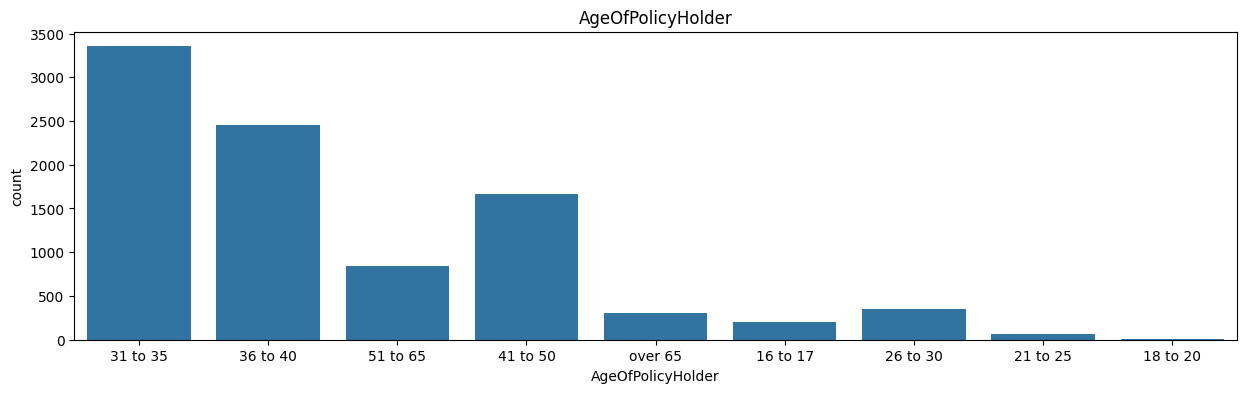

In [17]:
# Visualize the AgeOfPolicyHolder
plt.figure(figsize = (15,4))
sns.countplot(data = eda_df,
            x = "AgeOfPolicyHolder")

plt.title("AgeOfPolicyHolder")
plt.show()

Most policy holder have 30s year old age

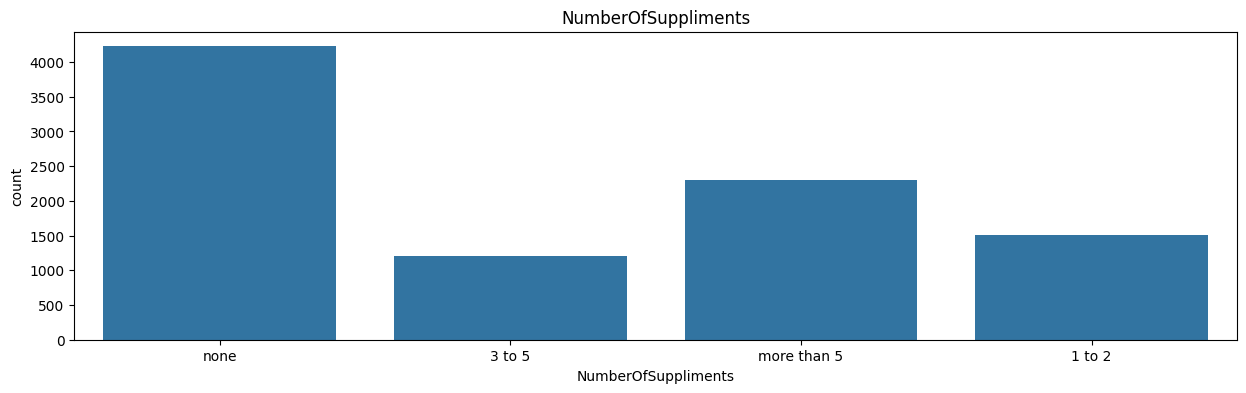

In [18]:
# Visualize the NumberOfSuppliments
plt.figure(figsize = (15,4))
sns.countplot(data = eda_df,
            x = "NumberOfSuppliments")

plt.title("NumberOfSuppliments")
plt.show()

Most of claims do not have suppliments

## Feature Engineering
---

Transform - convert all category into numerical with ordered values

In [19]:
def transformVehiclePrice(data):
    month_list = ["less than 20000", "20000 to 29000", "30000 to 39000", "40000 to 59000",
                  "60000 to 69000", "more than 69000"]

    number_list = [i+1 for i in range(len(month_list))]

    data["VehiclePrice"] = data["VehiclePrice"].replace(month_list, number_list)

    return data

In [20]:
def transformAgeOfVehicle(data):
    month_list = ["new", "2 years", "3 years", "4 years",
                  "5 years", "6 years", "7 years","more than 7"]

    number_list = [i for i in range(len(month_list))]

    data["AgeOfVehicle"] = data["AgeOfVehicle"].replace(month_list, number_list)

    return data

In [21]:
def transformPastNumberOfClaims(data):
    month_list = ["none", "1", "2 to 4", "more than 4"]

    number_list = [i for i in range(len(month_list))]

    data["PastNumberOfClaims"] = data["PastNumberOfClaims"].replace(month_list, number_list)

    return data

In [22]:
def transformAgeOfPolicyHolder(data):
    month_list = ["16 to 17", "18 to 20", "21 to 25", "26 to 30",
                  "31 to 35", "36 to 40", "41 to 50","51 to 65",
                 "over 65"]

    number_list = [i+1 for i in range(len(month_list))]

    data["AgeOfPolicyHolder"] = data["AgeOfPolicyHolder"].replace(month_list, number_list)

    return data

In [23]:
def transformNumberOfSuppliments(data):
    month_list = ["none", "1 to 2", "3 to 5", "more than 5"]

    number_list = [i for i in range(len(month_list))]

    data["NumberOfSuppliments"] = data["NumberOfSuppliments"].replace(month_list, number_list)

    return data

In [24]:
X_train = transformVehiclePrice(data = X_train)
X_train = transformAgeOfVehicle(data = X_train)
X_train = transformPastNumberOfClaims(data = X_train)
X_train = transformAgeOfPolicyHolder(data = X_train)
X_train = transformNumberOfSuppliments(data = X_train)

In [25]:
X_train.head()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
7719,2,6,0,5,0
11617,6,7,2,6,2
12050,3,6,3,6,3
6180,2,7,3,8,1
8035,2,6,0,7,1


sanichek

In [26]:
# Cek missing value
X_train.isna().any()

VehiclePrice           False
AgeOfVehicle           False
PastNumberOfClaims     False
AgeOfPolicyHolder      False
NumberOfSuppliments    False
dtype: bool

In [27]:
# Create imputer, if needed in testing data
from sklearn.impute import SimpleImputer

def imputerNumeric(data, imputer = None):
    if imputer == None:
        # Create imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    # Transform data
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data = data_imputed,
                                columns = data.columns,
                                index = data.index)

    return data_imputed, imputer

In [28]:
train_imputed, train_imputer = imputerNumeric(data = X_train)

In [29]:
train_imputed.head()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
7719,2.0,6.0,0.0,5.0,0.0
11617,6.0,7.0,2.0,6.0,2.0
12050,3.0,6.0,3.0,6.0,3.0
6180,2.0,7.0,3.0,8.0,1.0
8035,2.0,6.0,0.0,7.0,1.0


# Unsupervised Learning
---

## K-Means
---

make separate group with similar character, and assign them into cluster, detect farthest observation from centroid as anomaly

In [30]:
from sklearn.cluster import KMeans

In [31]:
# Create k-means object
kmeans_obj = KMeans(n_clusters = 3,
                    random_state = 123)

In [32]:
# Fit k-means
kmeans_obj.fit(train_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=123)

In [33]:
# Predict Cluster
cluster_result = kmeans_obj.predict(train_imputed)

In [34]:
# Predict Cluster
cluster_result = kmeans_obj.predict(train_imputed)

In [35]:
# Reshape predicted cluster to dataframe
cluster_result_train = kmeans_obj.predict(train_imputed)
cluster_result_train = pd.DataFrame(data = cluster_result,
                              columns = ["cluster"],
                              index = train_imputed.index)

In [36]:
cluster_result_train.head()

,cluster
7719,1
11617,2
12050,1
6180,1
8035,1


check proporsi cluster

In [37]:
cluster_result_train["cluster"].value_counts(normalize = True)

cluster
1    0.819390
2    0.144509
0    0.036100
Name: proportion, dtype: float64

2 clusters have 18% proportion of all data training

In [38]:
# Check centroid
kmeans_obj.cluster_centers_

array([[5.19161677, 0.56886228, 1.23053892, 2.14071856, 0.32335329],
       [2.1982588 , 5.74858198, 1.3434903 , 5.9758607 , 1.18361694],
       [5.61032162, 6.04562453, 1.40538519, 6.31787584, 1.31862378]])

In [39]:
# Create dataframe
centroids = kmeans_obj.cluster_centers_
centroids = pd.DataFrame(data = centroids,
                         columns = train_imputed.columns)

centroids

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
0,5.191617,0.568862,1.230539,2.140719,0.323353
1,2.198259,5.748582,1.343490,5.975861,1.183617
2,5.610322,6.045625,1.405385,6.317876,1.318624


*BEST K?*

Score -- within-cluster sum-of-squares

$$
\text{scores} = - \sum_{i=0}^{n} ||x_{i} - \mu_{j}||^{2}
$$

In [40]:
# show score
- kmeans_obj.score(train_imputed)

50777.363248011694

In [41]:
score_list = []
k_list = np.arange(2, 11, 1)

for k in k_list:
    # Buat object
    kmeans_obj_k = KMeans(n_clusters = k,
                          max_iter = 50,
                          random_state = 123)

    # Fit data
    kmeans_obj_k.fit(train_imputed)

    # update score
    score_k = -kmeans_obj_k.score(train_imputed)
    score_list.append(score_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [42]:
score_list = []
k_list = np.arange(2, 11, 1)

for k in k_list:
    # Buat object
    kmeans_obj_k = KMeans(n_clusters = k,
                          max_iter = 50,
                          random_state = 123)

    # Fit data
    kmeans_obj_k.fit(train_imputed)

    # update score
    score_k = -kmeans_obj_k.score(train_imputed)
    score_list.append(score_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [43]:
score_list

[62705.70290084185,
 50777.363248011694,
 39990.65014184474,
 32517.375846611954,
 29115.05390396861,
 26725.173599945134,
 24479.274106003766,
 23229.93701027236,
 21689.04882539279]

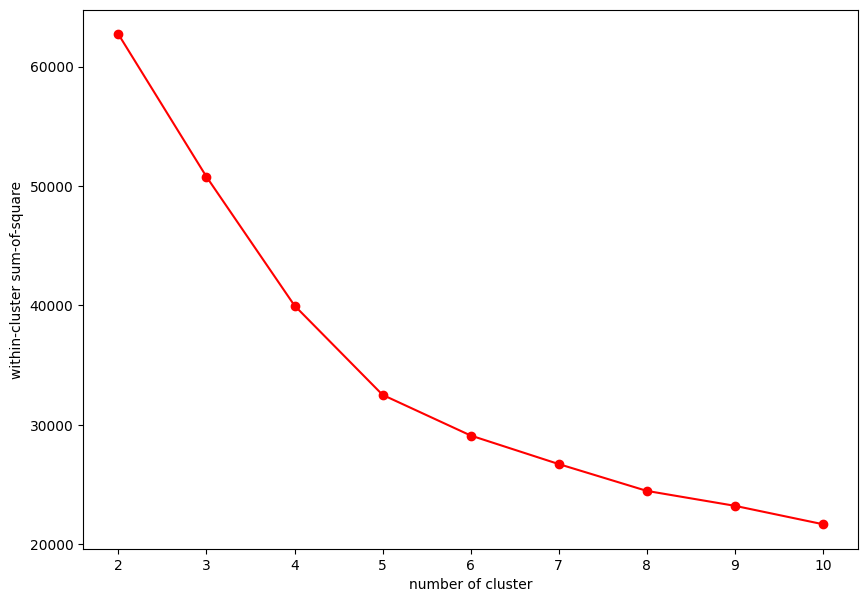

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(k_list, score_list, "r", marker="o")

ax.set_xlabel("number of cluster")
ax.set_ylabel("within-cluster sum-of-square")
plt.show()

- The more clusters, the lower the score.
- But, the more clusters, the more complex it is to interpret.
- We try to take the best cluster at 5, because the error change in cluster 6 is smaller

We want to other method for obtain best 'K'

Formula:

- $ CH = \frac {B}{W} \cdot \frac {N-k} {k-1} $

- $ DB =  \frac {1}{k}\sum_{i=1}^{k} max_j\neq_i \frac{s_i + s_j}{d(C_i,C_j)} $

- $ Silhouette = \frac {1}{N}\sum_{i=1}^{N} \frac{b_i - a_i}{max(a_i,b_i)} $

In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings

In [46]:
# Suppress warnings
warnings.filterwarnings("ignore")

def silhouette_validation(data, model):
    """
    Evaluate clustering using Silhouette Score.

    Parameters:
    -----------
    data: array-like or pandas DataFrame
      Input data for clustering.
    model: clustering model instance
      The clustering model to use (e.g., KMeans, GaussianMixture).

    Returns:
    --------
    best_components_silhouette: int
      The number of clusters that resulted in the best Silhouette Score.
    """
    # Evaluation using Silhouette Score
    score_silhouette = []
    for i in range(2, min(10, len(data))):
        # Perform clustering
        clustering_model = model(n_clusters=i, random_state=42)
        clusters = clustering_model.fit_predict(data)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, clusters)

        # Save the result
        score_silhouette.append(silhouette_avg)

    best_index_silhouette = np.argmax(score_silhouette)
    best_components_silhouette = best_index_silhouette + 2

    # Print the best result using Silhouette Score
    print(f'Best cluster (Silhouette Score) = {best_components_silhouette},'
          f' dengan score = {score_silhouette[best_index_silhouette]}')

    return best_components_silhouette, score_silhouette[best_index_silhouette]

def ch_validation(data, model):
    """
    Evaluate clustering using Calinski-Harabasz Index.

    Parameters:
    ----------
    data: array-like or pandas DataFrame
      Input data for clustering.
    model: clustering model instance
      The clustering model to use (e.g., KMeans, GaussianMixture).

    Returns:
    --------
    best_components_calinski_harabasz: int
      The number of clusters that resulted in the best Calinski-Harabasz Index.
    """
    # Evaluation using Calinski-Harabasz Index
    score_calinski_harabasz = []
    for i in range(2, min(10, len(data))):
        # Perform clustering
        clustering_model = model(n_clusters=i, random_state=42)
        clusters = clustering_model.fit_predict(data)

        # Calculate Calinski-Harabasz Index
        calinski_harabasz_avg = calinski_harabasz_score(data, clusters)

        # Save the result
        score_calinski_harabasz.append(calinski_harabasz_avg)

    best_index_calinski_harabasz = np.argmax(score_calinski_harabasz)
    best_components_calinski_harabasz = best_index_calinski_harabasz + 2

    # Print the best result using Calinski-Harabasz Index
    print(f'Best cluster (Calinski-Harabasz Index) = {best_components_calinski_harabasz},'
          f' dengan score = {score_calinski_harabasz[best_index_calinski_harabasz]}')

    return best_components_calinski_harabasz, score_calinski_harabasz[best_index_calinski_harabasz]

def db_validation(data, model):
    """
    Evaluate clustering using Davies-Bouldin Score.

    Parameters:
    -----------
    data: array-like or pandas DataFrame
      Input data for clustering.
    model: clustering model instance
      The clustering model to use (e.g., KMeans, GaussianMixture).

    Returns:
    --------
    best_components_davies_bouldin: int
      The number of clusters that resulted in the best Davies-Bouldin Score.
    """
    # Evaluation using Davies-Bouldin Score
    score_davies_bouldin = []
    for i in range(2, min(10, len(data))):
        # Perform clustering
        clustering_model = model(n_clusters=i, random_state=42)
        clusters = clustering_model.fit_predict(data)

        # Calculate Davies-Bouldin Score
        davies_bouldin_avg = davies_bouldin_score(data, clusters)

        # Save the result
        score_davies_bouldin.append(davies_bouldin_avg)

    best_index_davies_bouldin = np.argmin(score_davies_bouldin)
    best_components_davies_bouldin = best_index_davies_bouldin + 2

    # Print the best result using Davies-Bouldin Score
    print(f'Best cluster (Davies-Bouldin Score) = {best_components_davies_bouldin},'
          f' dengan score = {score_davies_bouldin[best_index_davies_bouldin]}')

    return best_components_davies_bouldin, score_davies_bouldin[best_index_davies_bouldin]

In [47]:
# Get the best number of clusters using evaluation functions
best_components_silhouette, silhouette_score  = silhouette_validation(train_imputed,
                                                                      KMeans)
best_components_calinski_harabasz, calinski_harabasz_score = ch_validation(train_imputed,
                                                                           KMeans)
best_components_davies_bouldin, davies_bouldin_score = db_validation(train_imputed,
                                                                     KMeans)

Best cluster (Silhouette Score) = 5, dengan score = 0.2841601843573126
Best cluster (Calinski-Harabasz Index) = 5, dengan score = 3386.6498365522416
Best cluster (Davies-Bouldin Score) = 5, dengan score = 1.0855936668958857


- Silhouette Score: The higher, the better. For this result, a score of 0.284 indicates the clusters are reasonably good but not ideal (above 0.5 is considered good).
- Calinski-Harabasz Index: The higher, the better. A score of 3386.65 indicates the clusters are very good.
- Davies-Bouldin Score: The lower, the better. A score of 1.086 indicates the clusters are reasonably good but not ideal (below 1 is considered good).

In [48]:
# Create a DataFrame to store the results
results_scores = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Score'],
    'Best Number of Clusters': [best_components_silhouette, best_components_calinski_harabasz, best_components_davies_bouldin],
    'Score': [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
})

In [49]:
results_scores

,Metric,Best Number of Clusters,Score
0,Silhouette Score,5,0.284160
1,Calinski-Harabasz Index,5,3386.649837
2,Davies-Bouldin Score,5,1.085594


## Gaussian Mixture (GMM)
---

In [50]:
from sklearn.mixture import GaussianMixture

In [51]:
# Create GMM object
gmm_obj = GaussianMixture(n_components=3, random_state=123)

In [52]:
# Fit GMM
gmm_obj.fit(train_imputed)

GaussianMixture(n_components=3, random_state=123)

In [53]:
# Predict Cluster
cluster_result = gmm_obj.predict(train_imputed)

In [54]:
# Predict Cluster
cluster_result = gmm_obj.predict(train_imputed)

In [55]:
# Reshape predicted cluster to dataframe
cluster_result_train = gmm_obj.fit_predict(train_imputed)
cluster_result_train = pd.DataFrame(data = cluster_result,
                              columns = ["cluster"],
                              index = train_imputed.index)

In [56]:
cluster_result_train.head()

,cluster
7719,0
11617,2
12050,1
6180,1
8035,1


check proporsi cluster

In [57]:
cluster_result_train["cluster"].value_counts(normalize = True)

cluster
0    0.495244
1    0.362732
2    0.142023
Name: proportion, dtype: float64

1 clusters have 14% proportion of all data training

In [58]:
# Check centroid
# means, covariances, and weights
print('Means', gmm_obj.means_)
print('covariances', gmm_obj.covariances_)
print('weights', gmm_obj.weights_)

Means [[2.14575259 5.1365561  1.39233486 5.20474261 1.19323605]
 [2.41137719 6.42899142 1.30604122 6.87324336 1.18569503]
 [6.         4.7914757  1.32572267 5.30821876 1.06544887]]
covariances [[[ 2.93456602e-01  5.55174454e-02  8.16192734e-02  2.66672690e-02
    6.88205796e-02]
  [ 5.55174454e-02  1.08924681e+00  3.92457200e-02  3.79722670e-01
    1.53274966e-01]
  [ 8.16192734e-02  3.92457200e-02  9.98914747e-01  1.35211994e-02
    1.81517585e-01]
  [ 2.66672690e-02  3.79722670e-01  1.35211994e-02  4.23278734e-01
    4.30368067e-02]
  [ 6.88205796e-02  1.53274966e-01  1.81517585e-01  4.30368067e-02
    1.54514594e+00]]

 [[ 6.58313830e-01  1.59656677e-03  1.43737505e-01 -1.20054343e-01
    4.57600588e-02]
  [ 1.59656677e-03  3.94933784e-01 -2.77690491e-02  2.94029173e-01
    6.45010503e-02]
  [ 1.43737505e-01 -2.77690491e-02  1.07424547e+00 -4.19577697e-02
    7.89877277e-02]
  [-1.20054343e-01  2.94029173e-01 -4.19577697e-02  1.13075492e+00
    5.88201435e-02]
  [ 4.57600588e-02  6.

In [59]:
# Create dataframe
centroids_gmm = gmm_obj.means_

centroids_gmm_df = pd.DataFrame(data=centroids_gmm,
                                columns=train_imputed.columns)
centroids_gmm_df

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
0,2.145753,5.136556,1.392335,5.204743,1.193236
1,2.411377,6.428991,1.306041,6.873243,1.185695
2,6.000000,4.791476,1.325723,5.308219,1.065449


In [60]:
# show score
- gmm_obj.score(train_imputed)

6.306396598127765

In [61]:
score_list = []
k_list = np.arange(2, 11, 1)

for k in k_list:
    # Buat object
    gmm_obj_k = GaussianMixture(n_components=k,
                                max_iter=50,
                                random_state=123)

    # Fit data
    gmm_obj_k.fit(train_imputed)

    # update score
    score_k = -gmm_obj_k.score(train_imputed)
    score_list.append(score_k)

In [62]:
score_list

[4.868695006080206,
 6.306396598127765,
 3.3259878818789668,
 5.67405829690122,
 1.1915481028750927,
 5.514194814610316,
 2.451487366810244,
 2.444543942451658,
 0.712860123008047]

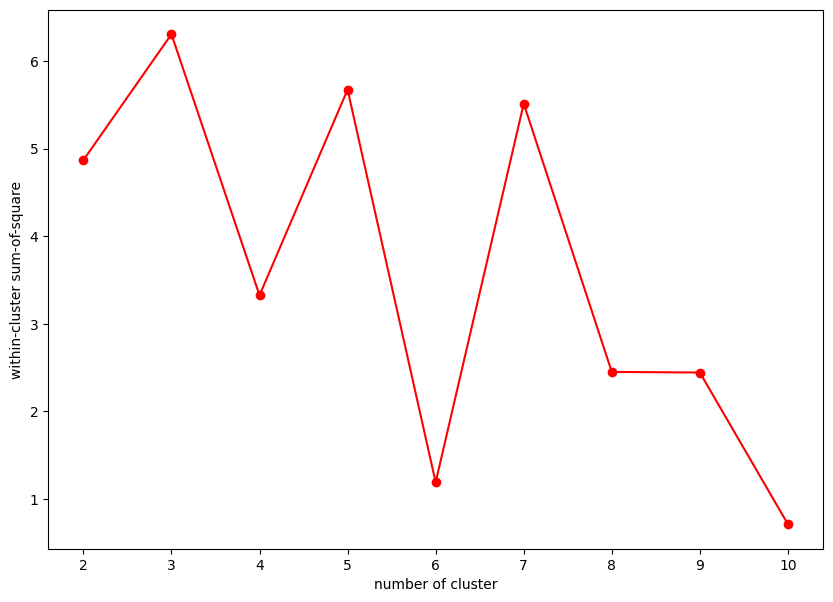

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.plot(k_list, score_list, "r", marker="o")

ax.set_xlabel("number of cluster")
ax.set_ylabel("within-cluster sum-of-square")
plt.show()

we obtain not good cluster, we can using other method

In [64]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import numpy as np

def silhouette_validation(data, model):
    """
    Evaluate clustering using Silhouette Score.

    Parameters:
    -----------
    data: array-like or pandas DataFrame
        Input data for clustering.
    model: clustering model instance
        The clustering model to use (e.g., GaussianMixture).

    Returns:
    --------
    best_components_silhouette: int
        The number of clusters that resulted in the best Silhouette Score.
    """
    # Evaluation using Silhouette Score
    score_silhouette = []
    for i in range(2, min(10, len(data))):
        # Perform clustering
        clustering_model = model(n_components=i, random_state=42)
        clusters = clustering_model.fit_predict(data)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(data, clusters)

        # Save the result
        score_silhouette.append(silhouette_avg)

    best_index_silhouette = np.argmax(score_silhouette)
    best_components_silhouette = best_index_silhouette + 2

    # Print the best result using Silhouette Score
    print(f'Best cluster (Silhouette Score) = {best_components_silhouette}, dengan score = {score_silhouette[best_index_silhouette]}')

    return best_components_silhouette, score_silhouette[best_index_silhouette]

from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def ch_validation(data, model):
    """
    Evaluate clustering using Calinski-Harabasz Index.

    Parameters:
    ----------
    data: array-like or pandas DataFrame
        Input data for clustering.
    model: clustering model instance
        The clustering model to use (e.g., GaussianMixture).

    Returns:
    --------
    best_components_calinski_harabasz: int
        The number of clusters that resulted in the best Calinski-Harabasz Index.
    """
    # Evaluation using Calinski-Harabasz Index
    score_calinski_harabasz = []
    for i in range(2, min(10, len(data))):
        # Perform clustering
        clustering_model = model(n_components=i, random_state=42)
        clusters = clustering_model.fit_predict(data)

        # Calculate Calinski-Harabasz Index
        calinski_harabasz_avg = calinski_harabasz_score(data, clusters)

        # Save the result
        score_calinski_harabasz.append(calinski_harabasz_avg)

    best_index_calinski_harabasz = np.argmax(score_calinski_harabasz)
    best_components_calinski_harabasz = best_index_calinski_harabasz + 2

    # Print the best result using Calinski-Harabasz Index
    print(f'Best cluster (Calinski-Harabasz Index) = {best_components_calinski_harabasz}, dengan score = {score_calinski_harabasz[best_index_calinski_harabasz]}')

    return best_components_calinski_harabasz, score_calinski_harabasz[best_index_calinski_harabasz]

def db_validation(data, model):
    """
    Evaluate clustering using Davies-Bouldin Score.

    Parameters:
    -----------
    data: array-like or pandas DataFrame
        Input data for clustering.
    model: clustering model instance
        The clustering model to use (e.g., GaussianMixture).

    Returns:
    --------
    best_components_davies_bouldin: int
        The number of clusters that resulted in the best Davies-Bouldin Score.
    """
    # Evaluation using Davies-Bouldin Score
    score_davies_bouldin = []
    for i in range(2, min(10, len(data))):
        # Perform clustering
        clustering_model = model(n_components=i, random_state=42)
        clusters = clustering_model.fit_predict(data)

        # Calculate Davies-Bouldin Score
        davies_bouldin_avg = davies_bouldin_score(data, clusters)

        # Save the result
        score_davies_bouldin.append(davies_bouldin_avg)

    best_index_davies_bouldin = np.argmin(score_davies_bouldin)
    best_components_davies_bouldin = best_index_davies_bouldin + 2

    # Print the best result using Davies-Bouldin Score
    print(f'Best cluster (Davies-Bouldin Score) = {best_components_davies_bouldin}, dengan score = {score_davies_bouldin[best_index_davies_bouldin]}')

    return best_components_davies_bouldin, score_davies_bouldin[best_index_davies_bouldin]

In [65]:
# # Get the best number of clusters using evaluation functions
best_components_silhouette_gmm, silhouette_score_gmm = silhouette_validation(train_imputed, GaussianMixture)

best_components_calinski_harabasz_gmm, calinski_harabasz_score_gmm = ch_validation(train_imputed,
                                                                           GaussianMixture)

best_components_davies_bouldin_gmm, davies_bouldin_score_gmm = db_validation(train_imputed,
                                                                     GaussianMixture)

Best cluster (Silhouette Score) = 4, dengan score = 0.2724068298612686
Best cluster (Calinski-Harabasz Index) = 5, dengan score = 2960.984796720415
Best cluster (Davies-Bouldin Score) = 5, dengan score = 1.1297948512031222


In [66]:
# Create a DataFrame to store the results
results_scores_gmm = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Score'],
    'Best Number of Clusters': [best_components_silhouette_gmm, best_components_calinski_harabasz_gmm,
                                best_components_davies_bouldin_gmm],
    'Score': [silhouette_score_gmm, calinski_harabasz_score_gmm,
              davies_bouldin_score_gmm]
})

In [67]:
results_scores_gmm

,Metric,Best Number of Clusters,Score
0,Silhouette Score,4,0.272407
1,Calinski-Harabasz Index,5,2960.984797
2,Davies-Bouldin Score,5,1.129795


Which the best model?

- Silhouette Score: Slightly higher for K-Means, indicating that K-Means may be better at separating and defining clusters overall.

- Calinski-Harabasz Index: Higher for K-Means, suggesting that the clusters generated by K-Means tend to be more separated and clearly defined.

- Davies-Bouldin Score: Lower for K-Means, indicating that K-Means produces clusters that are more internally homogeneous.

- Overall Score: Although not a traditional clustering metric, the significantly lower likelihood score for GMM suggests that K-Means might be more suitable for anomaly detection cases due to its better fit with well-defined data structures.

*Note : remember GMM just used if you have bimodal distribution*

## LOF (Local Outlier Factor)
---

In [68]:
train_imputed_next = train_imputed.copy()

d2 = train_imputed_next.values

In [69]:
from sklearn.neighbors import LocalOutlierFactor

In [70]:
# Create object
lof_obj_best = LocalOutlierFactor(n_neighbors = 3,
                                  contamination=0.2)

# Fit object
lof_obj_best.fit(train_imputed_next)

LocalOutlierFactor(contamination=0.2, n_neighbors=3)

In [71]:
# predict
train_imputed_next['anomaly'] = lof_obj_best.fit_predict(train_imputed_next)

In [72]:
# anomaly score
anomaly_scores_train = lof_obj_best.negative_outlier_factor_

In [73]:
anomaly_scores_train

array([-1., -1., -1., ..., -1., -1., -1.])

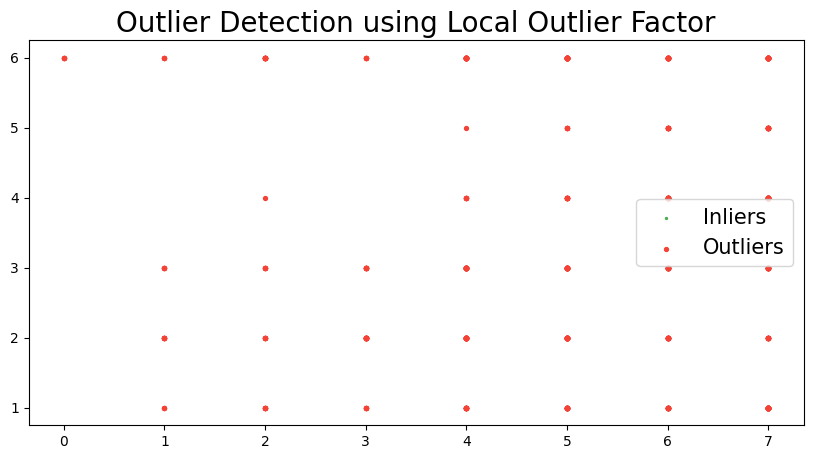

In [74]:
# Plotting the inliers and outliers
plt.figure(figsize=(10, 5))
plt.scatter(d2[train_imputed_next['anomaly'] == 1, 1], d2[train_imputed_next['anomaly'] == 1, 0], s=2, label="Inliers", color="#4CAF50")
plt.scatter(d2[train_imputed_next['anomaly'] == -1, 1], d2[train_imputed_next['anomaly'] == -1, 0], s=8, label="Outliers", color="#F44336")

# Set plot title and legend
plt.title('Outlier Detection using Local Outlier Factor', fontsize=20)
plt.legend(fontsize=15, title_fontsize=15)

# Show the plot
plt.show()

We can confuse if using LOF, because we just show with visualization

# Clustering Data
---

Finally we select 5 cluster!

In [75]:
# Create object
kmeans_obj_best = KMeans(n_clusters = 5,
                         random_state = 123)

# Fit object
kmeans_obj_best.fit(train_imputed)

KMeans(n_clusters=5, random_state=123)

Show Centroid

In [76]:
# Create dataframe
centroids_best = kmeans_obj_best.cluster_centers_
centroids_best = pd.DataFrame(data = centroids_best,
                              columns = train_imputed.columns)


centroids_best

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
0,5.740072,0.288809,1.231047,1.797834,0.162455
1,5.931250,5.932143,1.350000,6.213393,1.302679
2,2.280861,6.732536,1.246411,7.483254,0.807177
3,2.324797,5.706504,1.530488,5.671545,2.713008
4,2.172769,5.149773,1.286536,5.269592,0.296218


In [77]:
cluster_best_train = kmeans_obj_best.predict(train_imputed)

cluster_best_train = pd.DataFrame(data = cluster_best_train,
                            columns = ["cluster"],
                            index= train_imputed.index)
cluster_best_train.head()

,cluster
7719,4
11617,1
12050,3
6180,2
8035,2


**Get Distance Points to Closest Centroid**

In [78]:
# return Series of distance between each point and its distance with the closest centroid
def getDistanceByPoint(data, model):

    distance = pd.Series()
    data = data.reset_index(drop = True)

    # iterate over each data
    for i in range(0, len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]

        # Calculate distance between data and the centroid
        distance.at[i] = np.linalg.norm(Xa-Xb)

    return distance

In [79]:
# Assume a values as an outlier / anomaly fraction from all data
outliers_fraction = 0.01

# Get the distance between each point and its nearest centroid.
# The biggest distances are considered as anomaly
distance = getDistanceByPoint(train_imputed,
                              kmeans_obj)
distance

0       7.034056
1       4.137312
2       7.712971
3       9.458645
4       8.078884
          ...   
9247    6.765011
9248    4.701675
9249    4.502673
9250    8.678495
9251    6.448700
Length: 9252, dtype: float64

In [80]:
# Get the number of outliers based on the fraction we assume
number_of_outliers = int(outliers_fraction * len(distance))

In [81]:
# Get the threshold based on the number of outlier
threshold = distance.nlargest(number_of_outliers).min()
threshold

10.09411323236078

In [82]:
#`anomaly` contain the anomaly result of the above method Cluster (0 : normal, 1 : anomaly)
anomaly = np.array((distance >= threshold).astype(int))
anomaly

array([0, 0, 0, ..., 0, 0, 0])

Get anomaly data statistics description

In [83]:
train_imputed.iloc[np.where(anomaly == 1)].describe()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,1.709677,6.989247,1.150538,8.978495,2.301075
std,0.600374,0.103695,1.010233,0.145848,0.964421
min,1.000000,6.000000,0.000000,8.000000,0.000000
25%,1.000000,7.000000,0.000000,9.000000,2.000000
50%,2.000000,7.000000,1.000000,9.000000,3.000000
75%,2.000000,7.000000,2.000000,9.000000,3.000000
max,3.000000,7.000000,3.000000,9.000000,3.000000


In [84]:
data_train_clean = train_imputed.copy()

data_train_clean['Anomaly'] = anomaly

In [85]:
data_train_clean

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments,Anomaly
7719,2.0,6.0,0.0,5.0,0.0,0
11617,6.0,7.0,2.0,6.0,2.0,0
12050,3.0,6.0,3.0,6.0,3.0,0
6180,2.0,7.0,3.0,8.0,1.0,0
8035,2.0,6.0,0.0,7.0,1.0,0
...,...,...,...,...,...,...
5191,2.0,5.0,2.0,6.0,1.0,0
13418,6.0,5.0,3.0,7.0,3.0,0
5390,6.0,7.0,0.0,7.0,0.0,0
860,2.0,7.0,1.0,7.0,0.0,0


How it compare with all data?

In [86]:
train_imputed.describe()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
count,9252.000000,9252.000000,9252.000000,9252.000000,9252.000000
mean,2.799395,5.604518,1.348357,5.886835,1.172071
std,1.452140,1.406854,1.024204,1.404954,1.246422
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,5.000000,0.000000,5.000000,0.000000
50%,2.000000,6.000000,1.000000,6.000000,1.000000
75%,3.000000,7.000000,2.000000,7.000000,2.000000
max,6.000000,7.000000,3.000000,9.000000,3.000000


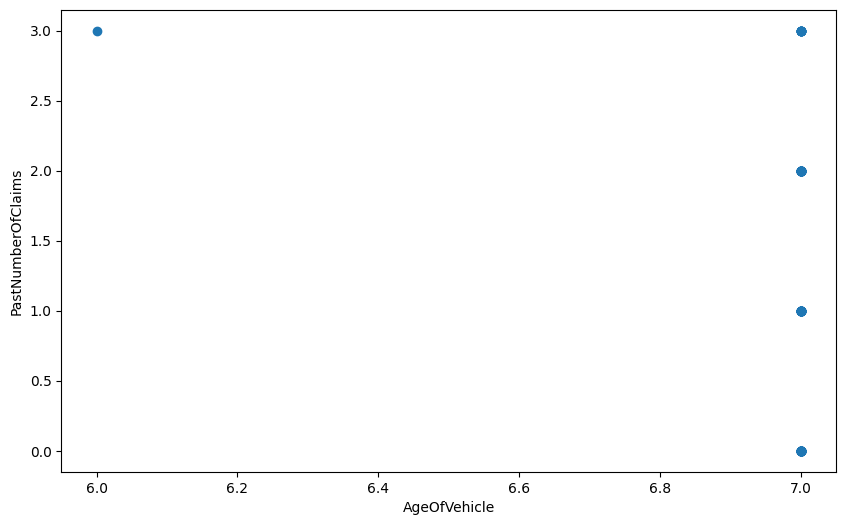

In [87]:
# Visualize the anomaly
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}

ax.scatter(train_imputed.iloc[np.where(anomaly == 1)]['AgeOfVehicle'],
           train_imputed.iloc[np.where(anomaly == 1)]['PastNumberOfClaims'])

plt.xlabel('AgeOfVehicle')
plt.ylabel('PastNumberOfClaims')
plt.show();

---
## Clustering Testing Data
____

In [88]:
def transformTestData(data, num_imputer):

    # 2. Handling Data
    data = transformVehiclePrice(data = data)
    data = transformAgeOfVehicle(data = data)
    data = transformPastNumberOfClaims(data = data)
    data = transformAgeOfPolicyHolder(data = data)
    data = transformNumberOfSuppliments(data = data)

    # 2.2 impute data
    data_imputed, _= imputerNumeric(data = data,
                                        imputer = num_imputer)

    return data_imputed

In [89]:
data_test_clean = transformTestData(data = X_test,
                                    num_imputer = train_imputer)

In [90]:
data_test_clean.head()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
4291,3.0,7.0,0.0,7.0,2.0
7874,2.0,5.0,0.0,7.0,0.0
3325,3.0,7.0,2.0,8.0,0.0
4048,6.0,5.0,1.0,4.0,3.0
15203,3.0,6.0,1.0,8.0,3.0


In [91]:
data_test_clean

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
4291,3.0,7.0,0.0,7.0,2.0
7874,2.0,5.0,0.0,7.0,0.0
3325,3.0,7.0,2.0,8.0,0.0
4048,6.0,5.0,1.0,4.0,3.0
15203,3.0,6.0,1.0,8.0,3.0
...,...,...,...,...,...
1569,2.0,7.0,1.0,8.0,0.0
1831,2.0,6.0,3.0,5.0,3.0
347,3.0,7.0,0.0,9.0,3.0
1242,3.0,7.0,2.0,8.0,2.0


In [92]:
best_cluster_test = kmeans_obj_best.predict(data_test_clean)

In [93]:
best_cluster_test

array([2, 4, 2, ..., 2, 2, 3], dtype=int32)

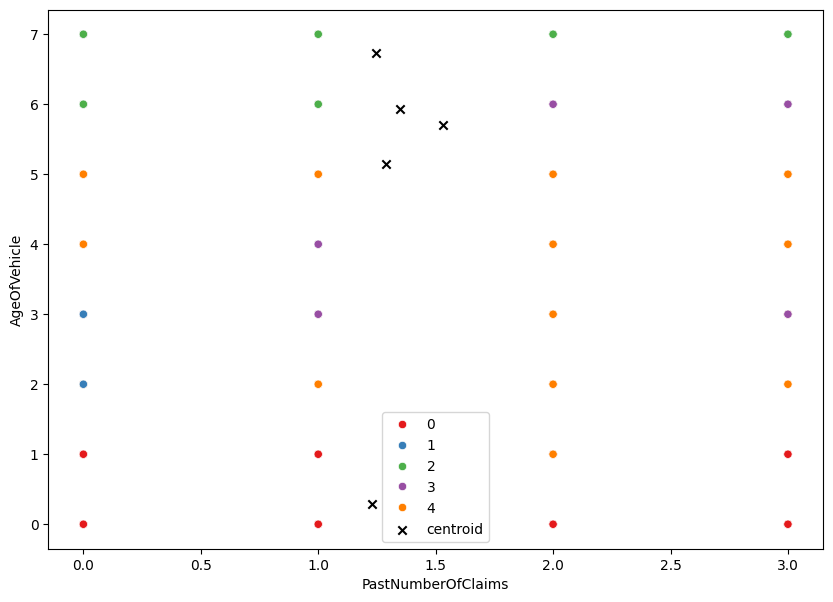

In [94]:
# Visualize
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

sns.scatterplot(data = data_test_clean,
                x = "PastNumberOfClaims",
                y = "AgeOfVehicle",
                hue = best_cluster_test,
                palette = "Set1",
                ax = ax)

ax.scatter(centroids_best["PastNumberOfClaims"],
           centroids_best["AgeOfVehicle"],
           marker="x", c="k", label="centroid")

plt.legend()
plt.show()

In [95]:
pd.Series(best_cluster_test).value_counts()

4    2194
3    1639
2    1430
1     721
0     184
Name: count, dtype: int64

In [96]:
# Get the distance between each point and its nearest centroid.
distance = getDistanceByPoint(data_test_clean,
                              kmeans_obj)

number_of_outliers = int(outliers_fraction * len(distance))

threshold = distance.nlargest(number_of_outliers).min()

# `anomaly` contain the anomaly result of the above method Cluster (0 : normal, 1 : anomaly)
anomaly = np.array((distance >= threshold).astype(int))

In [97]:
data_test_clean.iloc[np.where(anomaly == 1)].describe()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1.645161,6.967742,1.209677,8.887097,2.032258
std,0.655288,0.178127,1.073329,0.319058,1.144735
min,1.000000,6.000000,0.000000,8.000000,0.000000
25%,1.000000,7.000000,0.000000,9.000000,1.000000
50%,2.000000,7.000000,1.000000,9.000000,3.000000
75%,2.000000,7.000000,2.000000,9.000000,3.000000
max,3.000000,7.000000,3.000000,9.000000,3.000000


In [98]:
data_test_clean['Anomaly'] = anomaly

In [99]:
data_test_clean.describe()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments,Anomaly
count,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,2.791180,5.607652,1.312905,5.899481,1.180285,0.010052
std,1.429328,1.388906,1.022378,1.382304,1.253212,0.099762
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,5.000000,0.000000,5.000000,0.000000,0.000000
50%,2.000000,6.000000,1.000000,6.000000,1.000000,0.000000
75%,3.000000,7.000000,2.000000,7.000000,3.000000,0.000000
max,6.000000,7.000000,3.000000,9.000000,3.000000,1.000000


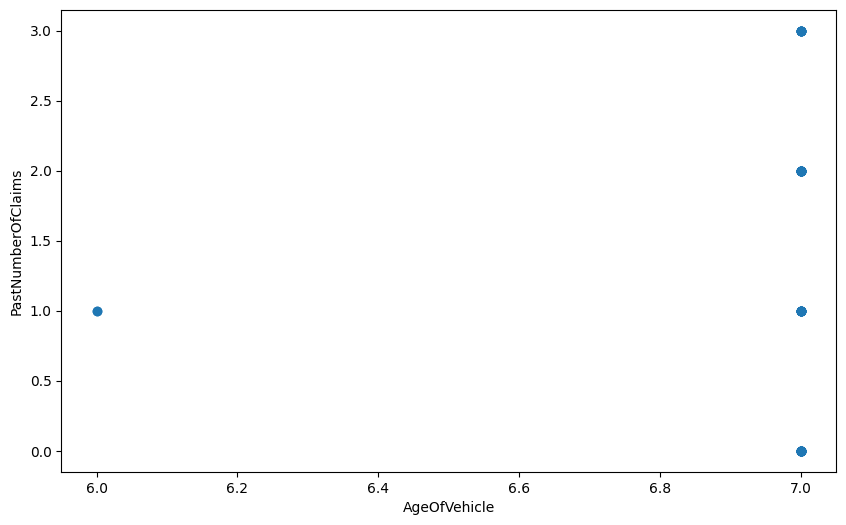

In [100]:
# Visualize the anomaly
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}

ax.scatter(data_test_clean.iloc[np.where(anomaly == 1)]['AgeOfVehicle'],
           data_test_clean.iloc[np.where(anomaly == 1)]['PastNumberOfClaims'])

plt.xlabel('AgeOfVehicle')
plt.ylabel('PastNumberOfClaims')
plt.show();

That's Good Model, We look the visualization is same between train and test

In [101]:
# combaine data between train and test
data_clean = pd.concat([data_train_clean, data_test_clean], ignore_index=True)
data_clean.head()

,VehiclePrice,AgeOfVehicle,PastNumberOfClaims,AgeOfPolicyHolder,NumberOfSuppliments,Anomaly
0,2.0,6.0,0.0,5.0,0.0,0
1,6.0,7.0,2.0,6.0,2.0,0
2,3.0,6.0,3.0,6.0,3.0,0
3,2.0,7.0,3.0,8.0,1.0,0
4,2.0,6.0,0.0,7.0,1.0,0


In [102]:
# sanichek
print('Before detection outlier', df_raw.shape)
print('After detection outlier', data_clean.shape)

Before detection outlier (15420, 33)
After detection outlier (15420, 6)


We obtain correct data!

# Part 2 - Prediction
---

In [103]:
X = data_clean.drop(columns=['Anomaly'])
y = data_clean['Anomaly']

split data to train and test

In [104]:
from sklearn.model_selection import train_test_split

def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split data into train & test

    Parameters
    ----------
    X : pd.DataFrame
        The input data

    y : pd.Series
        The output data

    test_size : float
        The proportion of number of test data to total data

    valid_size : float
        The proportion of number of validation data to total data

    stratify : pd.Series
        Reference to stratify the splitting

    random_state : int, default=42
        The random seed, for reproducibility

    Returns
    -------
    X_train : pd.DataFrame
        The input train data

    X_test : pd.DataFrame
        The input test data

    y_train : pd.Series
        The output train data

    y_test : pd.Series
        The output test data
    """
    # Split the data
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    # Then, split valid and test from not_train
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    # Validate
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [105]:
# Run the code
splitted_data = split_train_valid_test(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data

X train shape: (9252, 5)
y train shape: (9252,)
X valid shape : (3084, 5)
y valid shape : (3084,)
X test shape : (3084, 5)
y test shape : (3084,)


<Axes: xlabel='Anomaly', ylabel='count'>

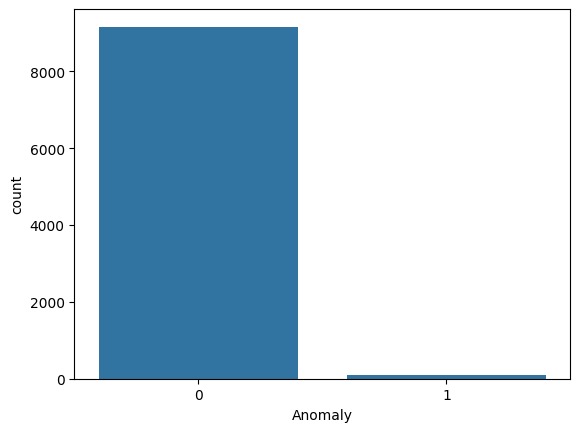

In [106]:
# Check the proportion of response categories
sns.countplot(x = y_train,
              dodge = False)

Extream unbalance, we must convert with oversamplig, undersampling, etc? no! we want real data for predict

In [107]:
# Import model

from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

## Create Models
---

In [108]:
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'svm': SVC(),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42)
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'svm': {'C':[0.1, 0.5, 1], 'kernel': ["linear", "poly", "rbf"]},
    'decision tree': {'max_depth': [5, 10, 20]},
    'random forest': {'n_estimators': [100, 300]}
}

## Hyperparameter Tuning
---

In [109]:
from sklearn.model_selection import GridSearchCV

In [111]:
# Perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    # Log
    print('start modeling', model_name)

    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3)
    cv_.fit(X_train, y_train)

    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    # append
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    # log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............., score=(train=0.999, test=0.999) total time=   0.0s
[CV 2/5] END ..............., score=(train=0.999, test=1.000) total time=   0.0s
[CV 3/5] END ..............., score=(train=0.999, test=0.999) total time=   0.0s
[CV 4/5] END ..............., score=(train=0.999, test=1.000) total time=   0.0s
[CV 5/5] END ...............

We using AUC for obtain suitable model with imbalance data

## Best Parameters
---

In [112]:
summ_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

summ_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.999358,0.999335,{}
2,svm,0.999288,0.999488,"{'C': 1, 'kernel': 'poly'}"
3,decision tree,0.999329,0.993346,{'max_depth': 5}
4,random forest,0.999884,0.999338,{'n_estimators': 100}


- Retraining model with best hyperparameters

In [113]:
dt_best = DecisionTreeClassifier(max_depth = 5)
dt_best.fit(X_train, y_train)

lr_best = LogisticRegression()
lr_best.fit(X_train, y_train)

svm_best = SVC(C = 1, kernel = 'rbf')
svm_best.fit(X_train, y_train)

rf_best = RandomForestClassifier(n_estimators = 300)
rf_best.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

# Prediction
---

### Best Model on Valid Data
---

**Logistic Regression**

In [114]:
y_val_pred = lr_best.predict(X_valid)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
roc_logit = roc_auc_score(y_valid, y_val_pred)

print('ROC  :', roc_logit)

ROC  : 0.8703126485846814


In [116]:
results_df_val = pd.DataFrame({
    'Metric': ['ROC AUC'],
    'Score': [roc_logit],
    'Model' : ['Logit']
})

In [117]:
results_df_val

,Metric,Score,Model
0,ROC AUC,0.870313,Logit


**Support Vector Machine**

In [118]:
y_val_pred = svm_best.predict(X_valid)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
roc_svm = roc_auc_score(y_valid, y_val_pred)

print('ROC  :', roc_svm)

ROC  : 0.7738660017116955


In [120]:
results_df_val = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm],
    'Model' : ['Logit', 'SVM']
})

In [121]:
results_df_val

,Metric,Score,Model
0,ROC AUC,0.870313,Logit
1,ROC AUC,0.773866,SVM


**Decision Tree**

In [122]:
y_val_pred = dt_best.predict(X_valid)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
roc_tree = roc_auc_score(y_valid, y_val_pred)

print('ROC  :', roc_tree)

ROC  : 0.8861141341673446


In [124]:
results_df_val = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm, roc_tree],
    'Model' : ['Logit', 'SVM', 'Tree']
})

In [125]:
results_df_val

,Metric,Score,Model
0,ROC AUC,0.870313,Logit
1,ROC AUC,0.773866,SVM
2,ROC AUC,0.886114,Tree


**Random Forest**

In [126]:
y_val_pred = rf_best.predict(X_valid)
y_val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
roc_forest = roc_auc_score(y_valid, y_val_pred)

print('ROC  :', roc_forest)

ROC  : 0.9503027165242015


In [128]:
results_df_val = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC', 'ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm, roc_tree, roc_forest],
    'Model' : ['Logit', 'SVM', 'Tree', 'Forest']
})

In [129]:
results_df_val

,Metric,Score,Model
0,ROC AUC,0.870313,Logit
1,ROC AUC,0.773866,SVM
2,ROC AUC,0.886114,Tree
3,ROC AUC,0.950303,Forest


### Best Model on Train Data
---

**Logistic Regression**

In [130]:
y_train_pred = lr_best.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
roc_logit = roc_auc_score(y_train, y_train_pred)

print('ROC  :', roc_logit)

ROC  : 0.8919817982664681


In [132]:
results_df_train = pd.DataFrame({
    'Metric': ['ROC AUC'],
    'Score': [roc_logit],
    'Model' : ['Logit']
})

In [133]:
results_df_train

,Metric,Score,Model
0,ROC AUC,0.891982,Logit


**Support Vector Machine**

In [134]:
y_train_pred = svm_best.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
roc_svm = roc_auc_score(y_train, y_train_pred)

print('ROC  :', roc_svm)

ROC  : 0.7847824632214392


In [136]:
results_df_train = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm],
    'Model' : ['Logit', 'SVM']
})

In [137]:
results_df_train

,Metric,Score,Model
0,ROC AUC,0.891982,Logit
1,ROC AUC,0.784782,SVM


**Decision Tree**

In [138]:
y_train_pred = dt_best.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [139]:
roc_tree = roc_auc_score(y_train, y_train_pred)

print('ROC  :', roc_tree)

ROC  : 0.902734486438511


In [140]:
results_df_train = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm, roc_tree],
    'Model' : ['Logit', 'SVM', 'Tree']
})

In [141]:
results_df_train

,Metric,Score,Model
0,ROC AUC,0.891982,Logit
1,ROC AUC,0.784782,SVM
2,ROC AUC,0.902734,Tree


**Random Forest**

In [142]:
y_train_pred = rf_best.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
roc_forest = roc_auc_score(y_train, y_train_pred)

print('ROC  :', roc_forest)

ROC  : 0.9834888299539674


In [144]:
results_df_train = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC', 'ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm, roc_tree, roc_forest],
    'Model' : ['Logit', 'SVM', 'Tree', 'Forest']
})

In [148]:
results_df_train

,Metric,Score,Model
0,ROC AUC,0.891982,Logit
1,ROC AUC,0.784782,SVM
2,ROC AUC,0.902734,Tree
3,ROC AUC,0.983489,Forest


In [147]:
result  = pd.crosstab(y_train_pred,
            y_train,
            margins = True)

result

Anomaly,0,1,All
row_0,,,
0,9152,3,9155
1,7,90,97
All,9159,93,9252


### Best Model on Test Data
---

**Logistic Regression**

In [149]:
y_test_pred = lr_best.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
roc_logit = roc_auc_score(y_test, y_test_pred)

print('ROC  :', roc_logit)

ROC  : 0.8382183574062528


In [151]:
results_df_test = pd.DataFrame({
    'Metric': ['ROC AUC'],
    'Score': [roc_logit],
    'Model' : ['Logit']
})

In [152]:
results_df_test

,Metric,Score,Model
0,ROC AUC,0.838218,Logit


**Support Vector Machine**

In [153]:
y_test_pred = svm_best.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
roc_svm = roc_auc_score(y_test, y_test_pred)

print('ROC  :', roc_svm)

ROC  : 0.757736969453631


In [155]:
results_df_test = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm],
    'Model' : ['Logit', 'SVM']
})

In [156]:
results_df_test

,Metric,Score,Model
0,ROC AUC,0.838218,Logit
1,ROC AUC,0.757737,SVM


**Decision Tree**

In [157]:
y_test_pred = dt_best.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [158]:
roc_tree = roc_auc_score(y_test, y_test_pred)

print('ROC  :', roc_tree)

ROC  : 0.8382183574062528


In [159]:
results_df_test = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm, roc_tree],
    'Model' : ['Logit', 'SVM', 'Tree']
})

In [160]:
results_df_test

,Metric,Score,Model
0,ROC AUC,0.838218,Logit
1,ROC AUC,0.757737,SVM
2,ROC AUC,0.838218,Tree


**Random Forest**

In [161]:
y_test_pred = rf_best.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [162]:
roc_forest = roc_auc_score(y_test, y_test_pred)

print('ROC  :', roc_forest)

ROC  : 0.9348287776169395


In [163]:
results_df_test = pd.DataFrame({
    'Metric': ['ROC AUC', 'ROC AUC', 'ROC AUC', 'ROC AUC'],
    'Score': [roc_logit, roc_svm, roc_tree, roc_forest],
    'Model' : ['Logit', 'SVM', 'Tree', 'Forest']
})

In [164]:
results_df_test

,Metric,Score,Model
0,ROC AUC,0.838218,Logit
1,ROC AUC,0.757737,SVM
2,ROC AUC,0.838218,Tree
3,ROC AUC,0.934829,Forest


In [165]:
result  = pd.crosstab(y_test_pred,
            y_test,
            margins = True)

result

Anomaly,0,1,All
row_0,,,
0,3049,4,3053
1,4,27,31
All,3053,31,3084


## Evaluation Model
---

In [166]:
results_df_val

,Metric,Score,Model
0,ROC AUC,0.870313,Logit
1,ROC AUC,0.773866,SVM
2,ROC AUC,0.886114,Tree
3,ROC AUC,0.950303,Forest


In [168]:
results_df_train

,Metric,Score,Model
0,ROC AUC,0.891982,Logit
1,ROC AUC,0.784782,SVM
2,ROC AUC,0.902734,Tree
3,ROC AUC,0.983489,Forest


In [167]:
results_df_test

,Metric,Score,Model
0,ROC AUC,0.838218,Logit
1,ROC AUC,0.757737,SVM
2,ROC AUC,0.838218,Tree
3,ROC AUC,0.934829,Forest


Best Model on Train Data

A good choice we chose the Random Forest model, but this model only remembers, doesn't learn well, because we only have very few sample anomalies

*Note : Because the data is extream unbalance, we can try deep learning for obtain good model*